In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Notebook for 2-stage auctions.

## Comparing truthful bidding an optimal shading

#define the function in the one strategic, one opponent setting

In [7]:
def keyFunctionOneOpponentUnif(r,myGamma=1.0):
    lhs = -np.log(1-r)
    rhs = 2*r + myGamma *(1-(r*(1-r)))*r*(1-r)
    temp = lhs  - rhs
    return(temp)

In [8]:
keyFunctionOneOpponentUnif(.5)

-0.4943528194400547

In [11]:
keyFunctionOneOpponentUnif(1.-10**(-6))

11.815511557937517

In [14]:
eps = 10**(-10)
x = np.linspace(.5,1.-eps,num=100)
res = keyFunctionOneOpponentUnif(x)

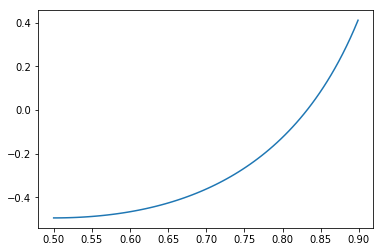

In [18]:
plt.plot(x[x<=.9],res[x<=.9])
plt.show()

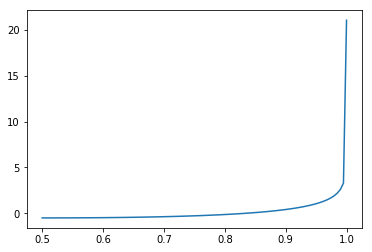

In [20]:
plt.plot(x,res)
plt.show()

# Dichotomous Search

In [26]:
def functionFindRoot(myTol,myGamma=1.0,myEps = 10**(-10)):
    #finds the root of the function keyFunctionOneOpponentUnif
    ub = 1 - myEps
    lb=.5
    currentPt = (ub + lb)/2.
    currentVal = keyFunctionOneOpponentUnif(currentPt,myGamma)
    #function assumed to be increasing
    while abs(currentVal) > myTol:
        if currentVal > 0.0:
            ub = currentPt
            currentPt = (currentPt + lb)/2.0
        else:
            lb = currentPt
            currentPt = (currentPt + ub)/2.0
        currentVal = keyFunctionOneOpponentUnif(currentPt,myGamma)
    return(currentPt)
        
    

In [28]:
test = functionFindRoot(10**(-3))
print(test)

0.8320312499335937


In [29]:
keyFunctionOneOpponentUnif(test)

-0.0003088909021431441

In [34]:
start_time =time.time()
test = functionFindRoot(10**(-6))
stop_time = time.time()
print(test,keyFunctionOneOpponentUnif(test))
print("Compute Time : ", stop_time -start_time)

0.8321008681586775 -2.556683007526317e-07
Compute Time :  0.00021910667419433594


In [38]:
theseGammas = np.exp(np.linspace(-2.0,2.0,num=21))
theseGammas

array([0.13533528, 0.16529889, 0.20189652, 0.24659696, 0.30119421,
       0.36787944, 0.44932896, 0.54881164, 0.67032005, 0.81873075,
       1.        , 1.22140276, 1.4918247 , 1.8221188 , 2.22554093,
       2.71828183, 3.32011692, 4.05519997, 4.95303242, 6.04964746,
       7.3890561 ])

In [39]:
theseRs = np.zeros(len(theseGammas))

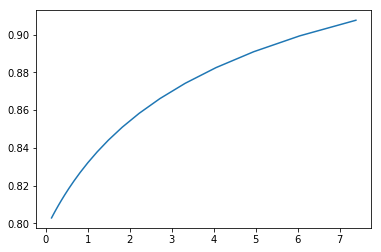

In [41]:
index = 0
for thisGamma in theseGammas:
    theseRs[index] = functionFindRoot(10**(-6),thisGamma)
    index += 1

plt.plot(theseGammas,theseRs)
plt.show()
    

In [42]:
testRForGammaZero =  functionFindRoot(10**(-6),myGamma = 0.0)

In [43]:
testRForGammaZero

0.7968120574357549

In [45]:
def functionUtilityRAboveMonopolyPriceOneStratUnif(r,myGamma=1.):
    rP = r*(1-r)
    t1 = r*(1-r)*(-np.log(1-r)-r)
    t2 = 1/6. - r**2*(.5-r/3.)
    t3 = 1/6 - rP**2*(.5-rP/3.)
    utility = t1 + t2 + myGamma * t3
    return(utility)

In [46]:
def functionUtilityRBelowMonopolyPriceOneStratUnif(r,myGamma = 1.):
    rP = .5
    t1 = r*(1-r)*(-np.log(1-r)-r)
    t2 = 1/6. - (r**2)*(.5-r/3.)
    t3 = 1/6 - (rP**2)*(.5-rP/3.)
    utility = t1 + t2 + myGamma * t3
    return(utility)

In [47]:
def computeUtilityBidder(r,myGamma = 1.):
    if r>.5:
        utility = functionUtilityRAboveMonopolyPriceOneStratUnif(r,myGamma)
    else:
        utility = functionUtilityRBelowMonopolyPriceOneStratUnif(r,myGamma)
    return(utility)


In [48]:
computeUtilityBidder(.7)

0.2895379555751132

In [66]:
myGamma = 1.0
theseTestRs = np.linspace(0,.99,num=100)
theseUtilities = np.zeros(len(theseTestRs))
index = 0
for thisR in theseTestRs:
    theseUtilities[index] = computeUtilityBidder(thisR,myGamma)
    index +=1
    

    

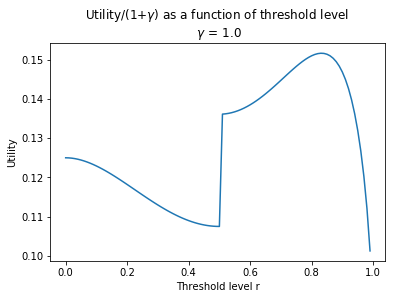

In [67]:

plt.plot(theseTestRs,theseUtilities/(1.+myGamma))
plt.xlabel("Threshold level r")
plt.ylabel("Utility")
plt.title("Utility/(1+$\gamma$) as a function of threshold level \n $\gamma$ = " + str(myGamma))
plt.show()

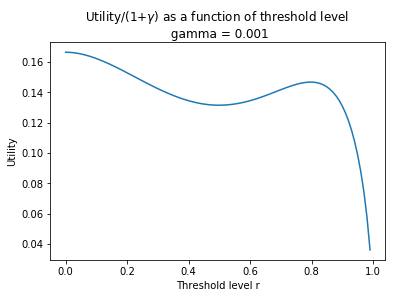

In [64]:
myGamma = 0.001
theseTestRs = np.linspace(0,.99,num=100)
theseUtilities = np.zeros(len(theseTestRs))
index = 0
for thisR in theseTestRs:
    theseUtilities[index] = computeUtilityBidder(thisR,myGamma)
    index +=1
    
plt.plot(theseTestRs,theseUtilities/(1.+myGamma))
plt.xlabel("Threshold level r")
plt.ylabel("Utility")
plt.title("Utility/(1+$\gamma$) as a function of threshold level \n gamma = " + str(myGamma))
plt.show()

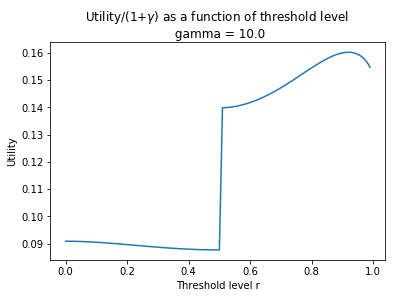

In [65]:
myGamma = 10.
theseTestRs = np.linspace(0,.99,num=100)
theseUtilities = np.zeros(len(theseTestRs))
index = 0
for thisR in theseTestRs:
    theseUtilities[index] = computeUtilityBidder(thisR,myGamma)
    index +=1
    
plt.plot(theseTestRs,theseUtilities/(1.+myGamma))
plt.xlabel("Threshold level r")
plt.ylabel("Utility")
plt.title("Utility/(1+$\gamma$) as a function of threshold level \n gamma = " + str(myGamma))
plt.show()

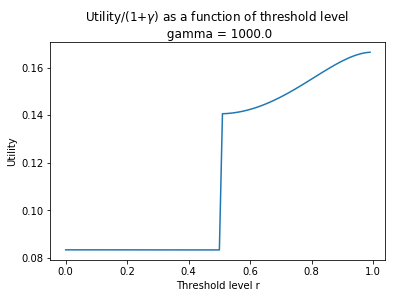

In [68]:
myGamma = 1000.
theseTestRs = np.linspace(0,.99,num=100)
theseUtilities = np.zeros(len(theseTestRs))
index = 0
for thisR in theseTestRs:
    theseUtilities[index] = computeUtilityBidder(thisR,myGamma)
    index +=1
    
plt.plot(theseTestRs,theseUtilities/(1.+myGamma))
plt.xlabel("Threshold level r")
plt.ylabel("Utility")
plt.title("Utility/(1+$\gamma$) as a function of threshold level \n gamma = " + str(myGamma))
plt.show()

In [126]:
def computeUtilityAndPlot(myGamma,numElements=100):
    theseTestRs = np.linspace(0,.99,num=numElements)
    theseUtilities = np.zeros(len(theseTestRs))
    index = 0
    for thisR in theseTestRs:
        theseUtilities[index] = computeUtilityBidder(thisR,myGamma)
        index +=1
    
    plt.plot(theseTestRs,theseUtilities/(1.+myGamma))
    plt.xlabel("Threshold level r")
    plt.ylabel("Utility")
    plt.title("Utility/(1+$\gamma$) as a function of threshold level \n gamma = " + str(myGamma))
    plt.show()
    optimalR = theseTestRs[np.argmax(theseUtilities)]
    DeltaOptimalThreshMinusTruthful = (np.max(theseUtilities) - theseUtilities[0])/(1.+myGamma)
    print("Optimal R is " + str(optimalR))
    print("Difference optimalThresholded - truthful :  "+ str(DeltaOptimalThreshMinusTruthful))
    return(optimalR)

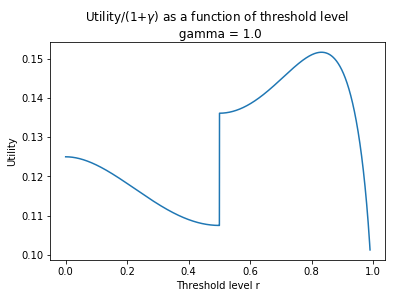

Optimal R is 0.832079207920792
Difference optimalThresholded - truthful :  0.026688667927735013


0.832079207920792

In [127]:
computeUtilityAndPlot(myGamma=1.0,numElements=10**4)

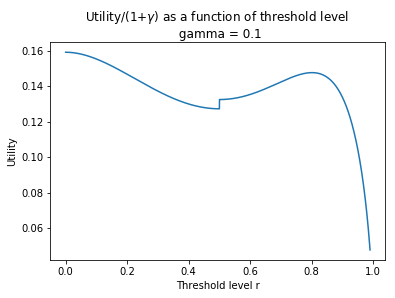

Optimal R is 0.0
Difference optimalThresholded - truthful :  0.0


0.0

In [128]:
computeUtilityAndPlot(myGamma=.1,numElements=10**4)

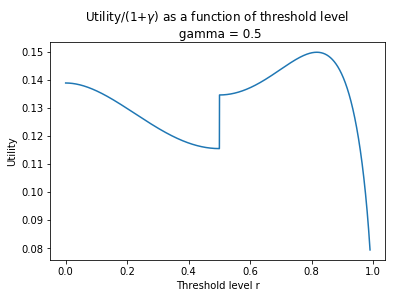

Optimal R is 0.8168316831683168
Difference optimalThresholded - truthful :  0.010953181183490165


0.8168316831683168

In [129]:
computeUtilityAndPlot(myGamma=.5,numElements=10**4)

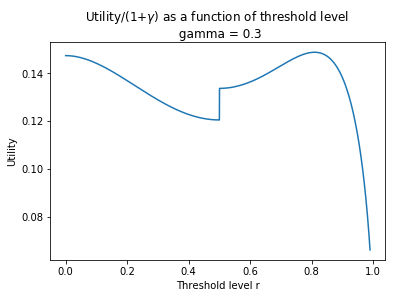

Optimal R is 0.8095049504950494
Difference optimalThresholded - truthful :  0.0014127082475099717


0.8095049504950494

In [130]:
computeUtilityAndPlot(myGamma=.3,numElements=10**4)

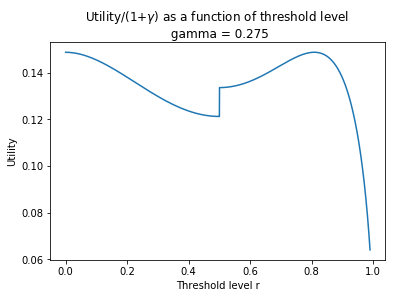

Optimal R is 0.8085148514851485
Difference optimalThresholded - truthful :  1.6351780079274014e-05


0.8085148514851485

In [131]:
computeUtilityAndPlot(myGamma=.275,numElements=10**4)

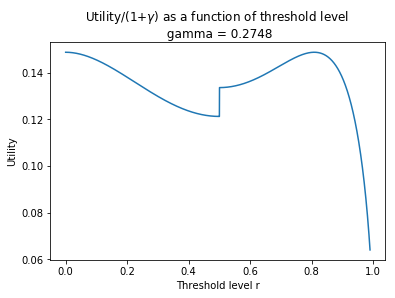

Optimal R is 0.8085148514851485
Difference optimalThresholded - truthful :  4.9665396481224975e-06


0.8085148514851485

In [132]:
computeUtilityAndPlot(myGamma=.2748,numElements=10**4)

# Including random reserve prices in the 1st stage

In [111]:
def functionUtilityRAboveMonopolyPriceOneStratUnifRandomReserves(r,myGamma=1.):
    #uses random reserves unif[0,1] in the first stage
    rP = r*(1-r)
    t1 = (rP**2)*(np.log(1-r)+1./(1.-r)-1.)
    t2 = 1/12. - (r**3)*(1/3.-r/4.)
    t3 = 1/6 - (rP**2)*(.5-rP/3.)
    utility = t1 + t2 + myGamma * t3
    return(utility)

In [112]:
def functionUtilityRBelowMonopolyPriceOneStratUnifRandomReserves(r,myGamma = 1.):
    #uses random reserves unif[0,1] in the first stage
    rP = r*(1-r)
    rP2 = .5 #reserve price in the second stage. The monopoly price
    t1 = (rP**2)*(np.log(1-r)+1./(1.-r)-1.)
    t2 = 1/12. - (r**3)*(1/3.-r/4.)
    t3 = 1/6 - (rP2**2)*(.5-rP2/3.)
    utility = t1 + t2 + myGamma * t3
    return(utility)

In [113]:
def computeUtilityBidderRandomReserves(r,myGamma = 1.):
    if r>.5:
        utility = functionUtilityRAboveMonopolyPriceOneStratUnifRandomReserves(r,myGamma)
    else:
        utility = functionUtilityRBelowMonopolyPriceOneStratUnifRandomReserves(r,myGamma)
    return(utility)


In [114]:
computeUtilityBidderRandomReserves(.7)

0.22653346599589289

In [122]:
def computeUtilityRandomReservesAndPlot(myGamma,numElements=100):
    theseTestRs = np.linspace(0,.99,num=numElements)
    theseUtilities = np.zeros(len(theseTestRs))
    index = 0
    for thisR in theseTestRs:
        theseUtilities[index] = computeUtilityBidderRandomReserves(thisR,myGamma)
        index +=1
    
    plt.plot(theseTestRs,theseUtilities/(1.+myGamma))
    plt.xlabel("Threshold level r")
    plt.ylabel("Utility")
    plt.title("Utility/(1+$\gamma$) as a function of threshold level \n gamma = " + str(myGamma) + "\n Random reserves in 1st stage")
    plt.show()
    optimalR = theseTestRs[np.argmax(theseUtilities)]
    DeltaOptimalThreshMinusTruthful = (np.max(theseUtilities) - theseUtilities[0])/(1.+myGamma)
    print("Optimal R is " + str(optimalR))
    print("Difference optimalThresholded - truthful :  "+ str(DeltaOptimalThreshMinusTruthful))
    return(optimalR)

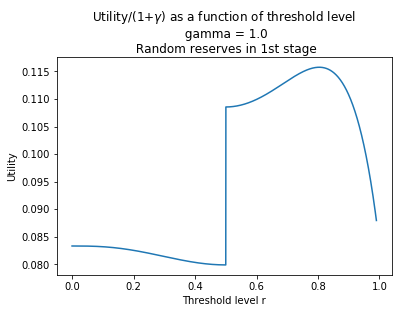

Optimal R is 0.8039603960396039
Difference optimalThresholded - truthful :  0.03242086286099452


0.8039603960396039

In [123]:
computeUtilityRandomReservesAndPlot(myGamma=1.0,numElements=10**4)

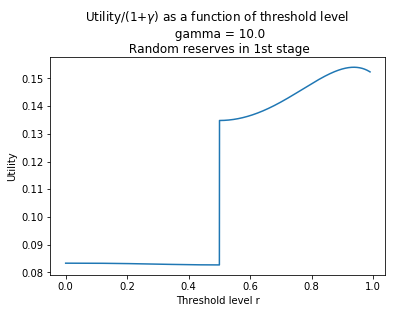

Optimal R is 0.9373267326732673
Difference optimalThresholded - truthful :  0.07066166144490454


0.9373267326732673

In [124]:
computeUtilityRandomReservesAndPlot(myGamma=10.0,numElements=10**4)

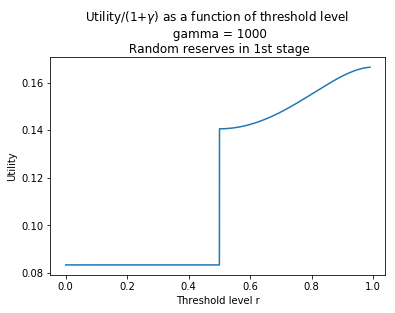

Optimal R is 0.99
Difference optimalThresholded - truthful :  0.08312749191418924


0.99

In [125]:
computeUtilityRandomReservesAndPlot(myGamma=10**3,numElements=10**4)

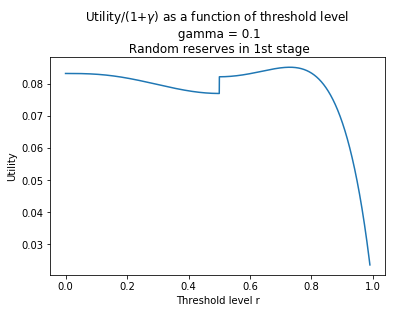

Optimal R is 0.7292079207920792
Difference optimalThresholded - truthful :  0.0019442287583805828


0.7292079207920792

In [133]:
computeUtilityRandomReservesAndPlot(myGamma=10**(-1),numElements=10**4)

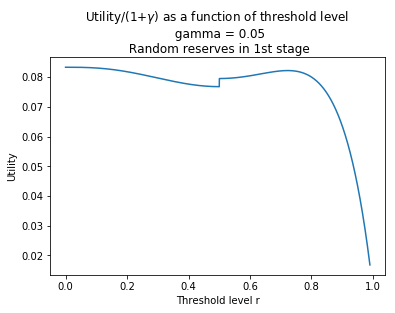

Optimal R is 0.0
Difference optimalThresholded - truthful :  0.0


0.0

In [134]:
computeUtilityRandomReservesAndPlot(myGamma=5*10**(-2),numElements=10**4)

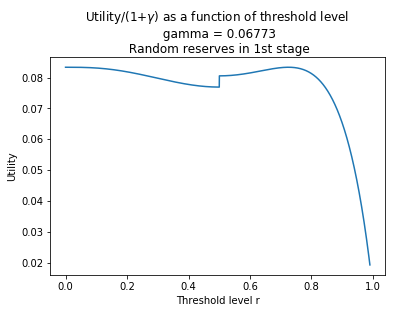

Optimal R is 0.7249504950495049
Difference optimalThresholded - truthful :  6.298630151392607e-07


0.7249504950495049

In [143]:
computeUtilityRandomReservesAndPlot(myGamma=6.773*10**(-2),numElements=10**4)

In [153]:
myGamma = 1.0
monopolyPlus = .51

interestingDiff = computeUtilityBidderRandomReserves(monopolyPlus,myGamma) - computeUtilityBidderRandomReserves(0.0,myGamma)

print("Utility when Thresh at Monopoly Price+ : " + str(computeUtilityBidderRandomReserves(monopolyPlus,myGamma)/(1.+myGamma)))
print("Utility when bidding truthful : " + str(computeUtilityBidderRandomReserves(0,myGamma)/(1.+myGamma)))
print("Difference between the two : " + str(interestingDiff/(1.+myGamma)))

Utility when Thresh at Monopoly Price+ : 0.10856168285077672
Utility when bidding truthful : 0.08333333333333331
Difference between the two : 0.025228349517443405


In [155]:
myGamma = 2.0
monopolyPlus = .51

interestingDiff = computeUtilityBidderRandomReserves(monopolyPlus,myGamma) - computeUtilityBidderRandomReserves(0.0,myGamma)

print("Utility when Thresh at Monopoly Price+ : " + str(computeUtilityBidderRandomReserves(monopolyPlus,myGamma)/(1.+myGamma)))
print("Utility when bidding truthful : " + str(computeUtilityBidderRandomReserves(0,myGamma)/(1.+myGamma)))
print("Difference between the two : " + str(interestingDiff/(1.+myGamma)))

Utility when Thresh at Monopoly Price+ : 0.11925570440040671
Utility when bidding truthful : 0.08333333333333331
Difference between the two : 0.03592237106707339


In [156]:
myGamma = 3.0
monopolyPlus = .51

interestingDiff = computeUtilityBidderRandomReserves(monopolyPlus,myGamma) - computeUtilityBidderRandomReserves(0.0,myGamma)

print("Utility when Thresh at Monopoly Price+ : " + str(computeUtilityBidderRandomReserves(monopolyPlus,myGamma)/(1.+myGamma)))
print("Utility when bidding truthful : " + str(computeUtilityBidderRandomReserves(0,myGamma)/(1.+myGamma)))
print("Difference between the two : " + str(interestingDiff/(1.+myGamma)))

Utility when Thresh at Monopoly Price+ : 0.12460271517522167
Utility when bidding truthful : 0.08333333333333331
Difference between the two : 0.04126938184188836


In [157]:
myGamma = 10.0
monopolyPlus = .51

interestingDiff = computeUtilityBidderRandomReserves(monopolyPlus,myGamma) - computeUtilityBidderRandomReserves(0.0,myGamma)

print("Utility when Thresh at Monopoly Price+ : " + str(computeUtilityBidderRandomReserves(monopolyPlus,myGamma)/(1.+myGamma)))
print("Utility when bidding truthful : " + str(computeUtilityBidderRandomReserves(0,myGamma)/(1.+myGamma)))
print("Difference between the two : " + str(interestingDiff/(1.+myGamma)))

Utility when Thresh at Monopoly Price+ : 0.13481064483623212
Utility when bidding truthful : 0.08333333333333331
Difference between the two : 0.051477311502898804


In [167]:
myGamma = .125
monopolyPlus = .50001

interestingDiff = computeUtilityBidderRandomReserves(monopolyPlus,myGamma) - computeUtilityBidderRandomReserves(0.0,myGamma)

print("Utility when Thresh at Monopoly Price+ : " + str(computeUtilityBidderRandomReserves(monopolyPlus,myGamma)/(1.+myGamma)))
print("Utility when bidding truthful : " + str(computeUtilityBidderRandomReserves(0,myGamma)/(1.+myGamma)))
print("Difference between the two : " + str(interestingDiff/(1.+myGamma)))

Utility when Thresh at Monopoly Price+ : 0.08359830479437441
Utility when bidding truthful : 0.08333333333333333
Difference between the two : 0.00026497146104107226


# Conclusion 

## When is it preferable to treshold at the monopoly price, as compared to bidding truthful, when seller uses random reserve prices in the first stage?

If thresholding at the monopoly price, when the seller uses random reserves in the first stage, it becomes favorable to threshold as soon as $\mathbf{\gamma>.125}$ or when the seller exploits at least $11\%$ of the time ($.125/1.125\simeq 11\%$) 

In [179]:
#same experiments but reserve price of 0 in first stage. 

myGamma = .615
monopolyPlus = .50001

interestingDiff = computeUtilityBidder(monopolyPlus,myGamma) - computeUtilityBidder(0.0,myGamma)

print("Utility when Thresh at Monopoly Price+ : " + str(computeUtilityBidder(monopolyPlus,myGamma)/(1.+myGamma)))
print("Utility when bidding truthful : " + str(computeUtilityBidder(0,myGamma)/(1.+myGamma)))
print("Difference between the two : " + str(interestingDiff/(1.+myGamma)))

Utility when Thresh at Monopoly Price+ : 0.13504922818299453
Utility when bidding truthful : 0.1349329205366357
Difference between the two : 0.00011630764635884025


## When is it preferable to treshold at the monopoly price, as compared to bidding truthful, when seller uses reserve price of 0 in the first stage?

If thresholding at the monopoly price, when the seller uses random reserves in the first stage, it becomes favorable to threshold as soon as $\mathbf{\gamma>.615}$ or when the seller exploits at least $38\%$ of the time ($.615/1.615\simeq 38\%$)